In [33]:
from util.draw_graphs import plot_all, plot_range
"""
Some experiment code refer from https://github.com/amitport/Towards-Federated-Learning-with-Byzantine-Robust-Client-Weighting

We consider the declare sample size originally, but remove it since it is not the major problem in our method


The server aggregator using numpy, but we find that the computation seems large
However, cupy and tf.tensor is not as convinient as numpy 


From 500 round of FL, we only update the model if the loss descend.
We do not use gradient clips but it might make the federated learning more robust.


Author: Cen-Jhih Li
Belongs: Academia Sinica, Institute of Statistical Science, Robust federated learning project
"""
plot_list = ['mean', 'median', 'gamma_mean_0_5', 'geometric_median', 't_mean_10']
gamma_list = [0.5, 0.2, 0.05, 0.01 ]
gamma_name = ['gamma_mean_{}'.format(str(gamma).replace(".","_")) for gamma in gamma_list]

A total plot of gamma mean


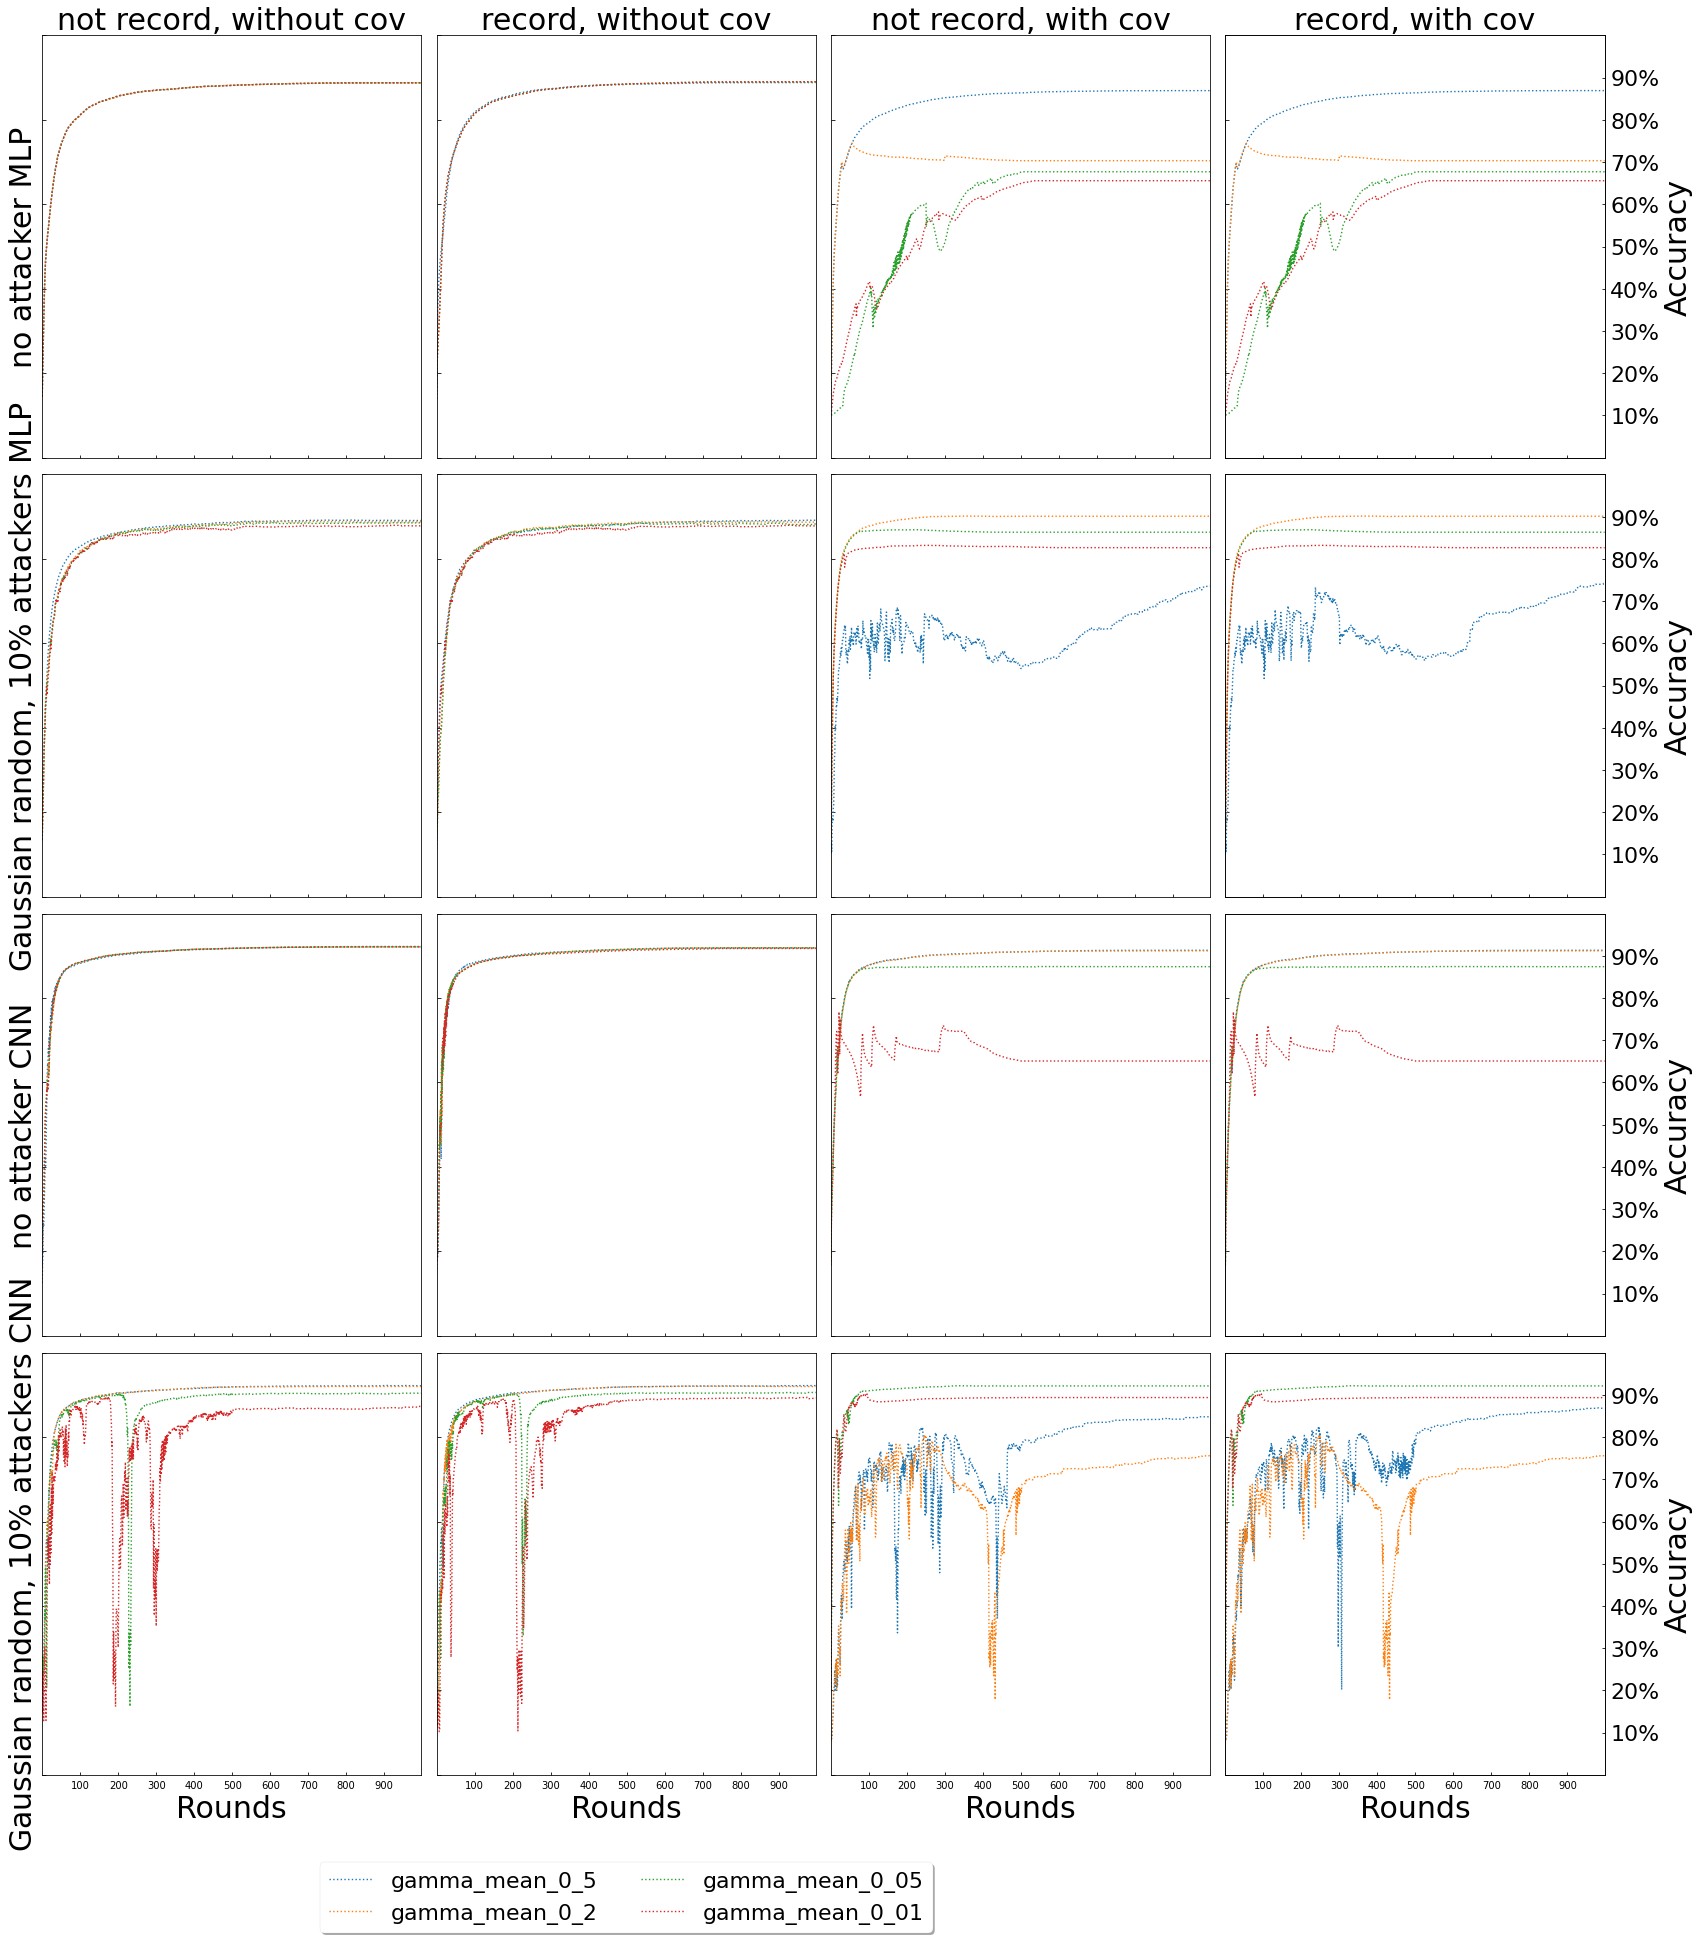

In [34]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print ('A total plot of gamma mean')

SMALL_SIZE = 10
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'not record, without cov')
ax2.set_title(r'record, without cov')
ax3.set_title(r'not record, with cov')
ax4.set_title(r'record, with cov')


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)#(0.5, 1)

ax5.set_ylabel('Gaussian random, $10\%$ attackers MLP')
ax5.set_ylim(0, 1)#(0.5, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)#(0.5, 1)

ax13.set_ylabel('Gaussian random, $10\%$ attackers CNN')
ax13.set_ylim(0, 1)#(0.5, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':') 
        for gamma in gamma_list
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1)

experiment = 'cnn_expr'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1)

ax14.legend(
           labels=gamma_name,   # The labels for each line
           loc="lower center", 
           fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.4),
           fancybox=True,
           shadow=True,
           ncol=2
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/gamma_mean_total_plot.pdf', format='pdf', bbox_inches='tight')

Analize the results with and without covariance, record gradients and not record in gamma mean 

Then compare different gamma first

Finally, evaluate the results across different aggregators

Analize the results with and without covariance in gamma mean


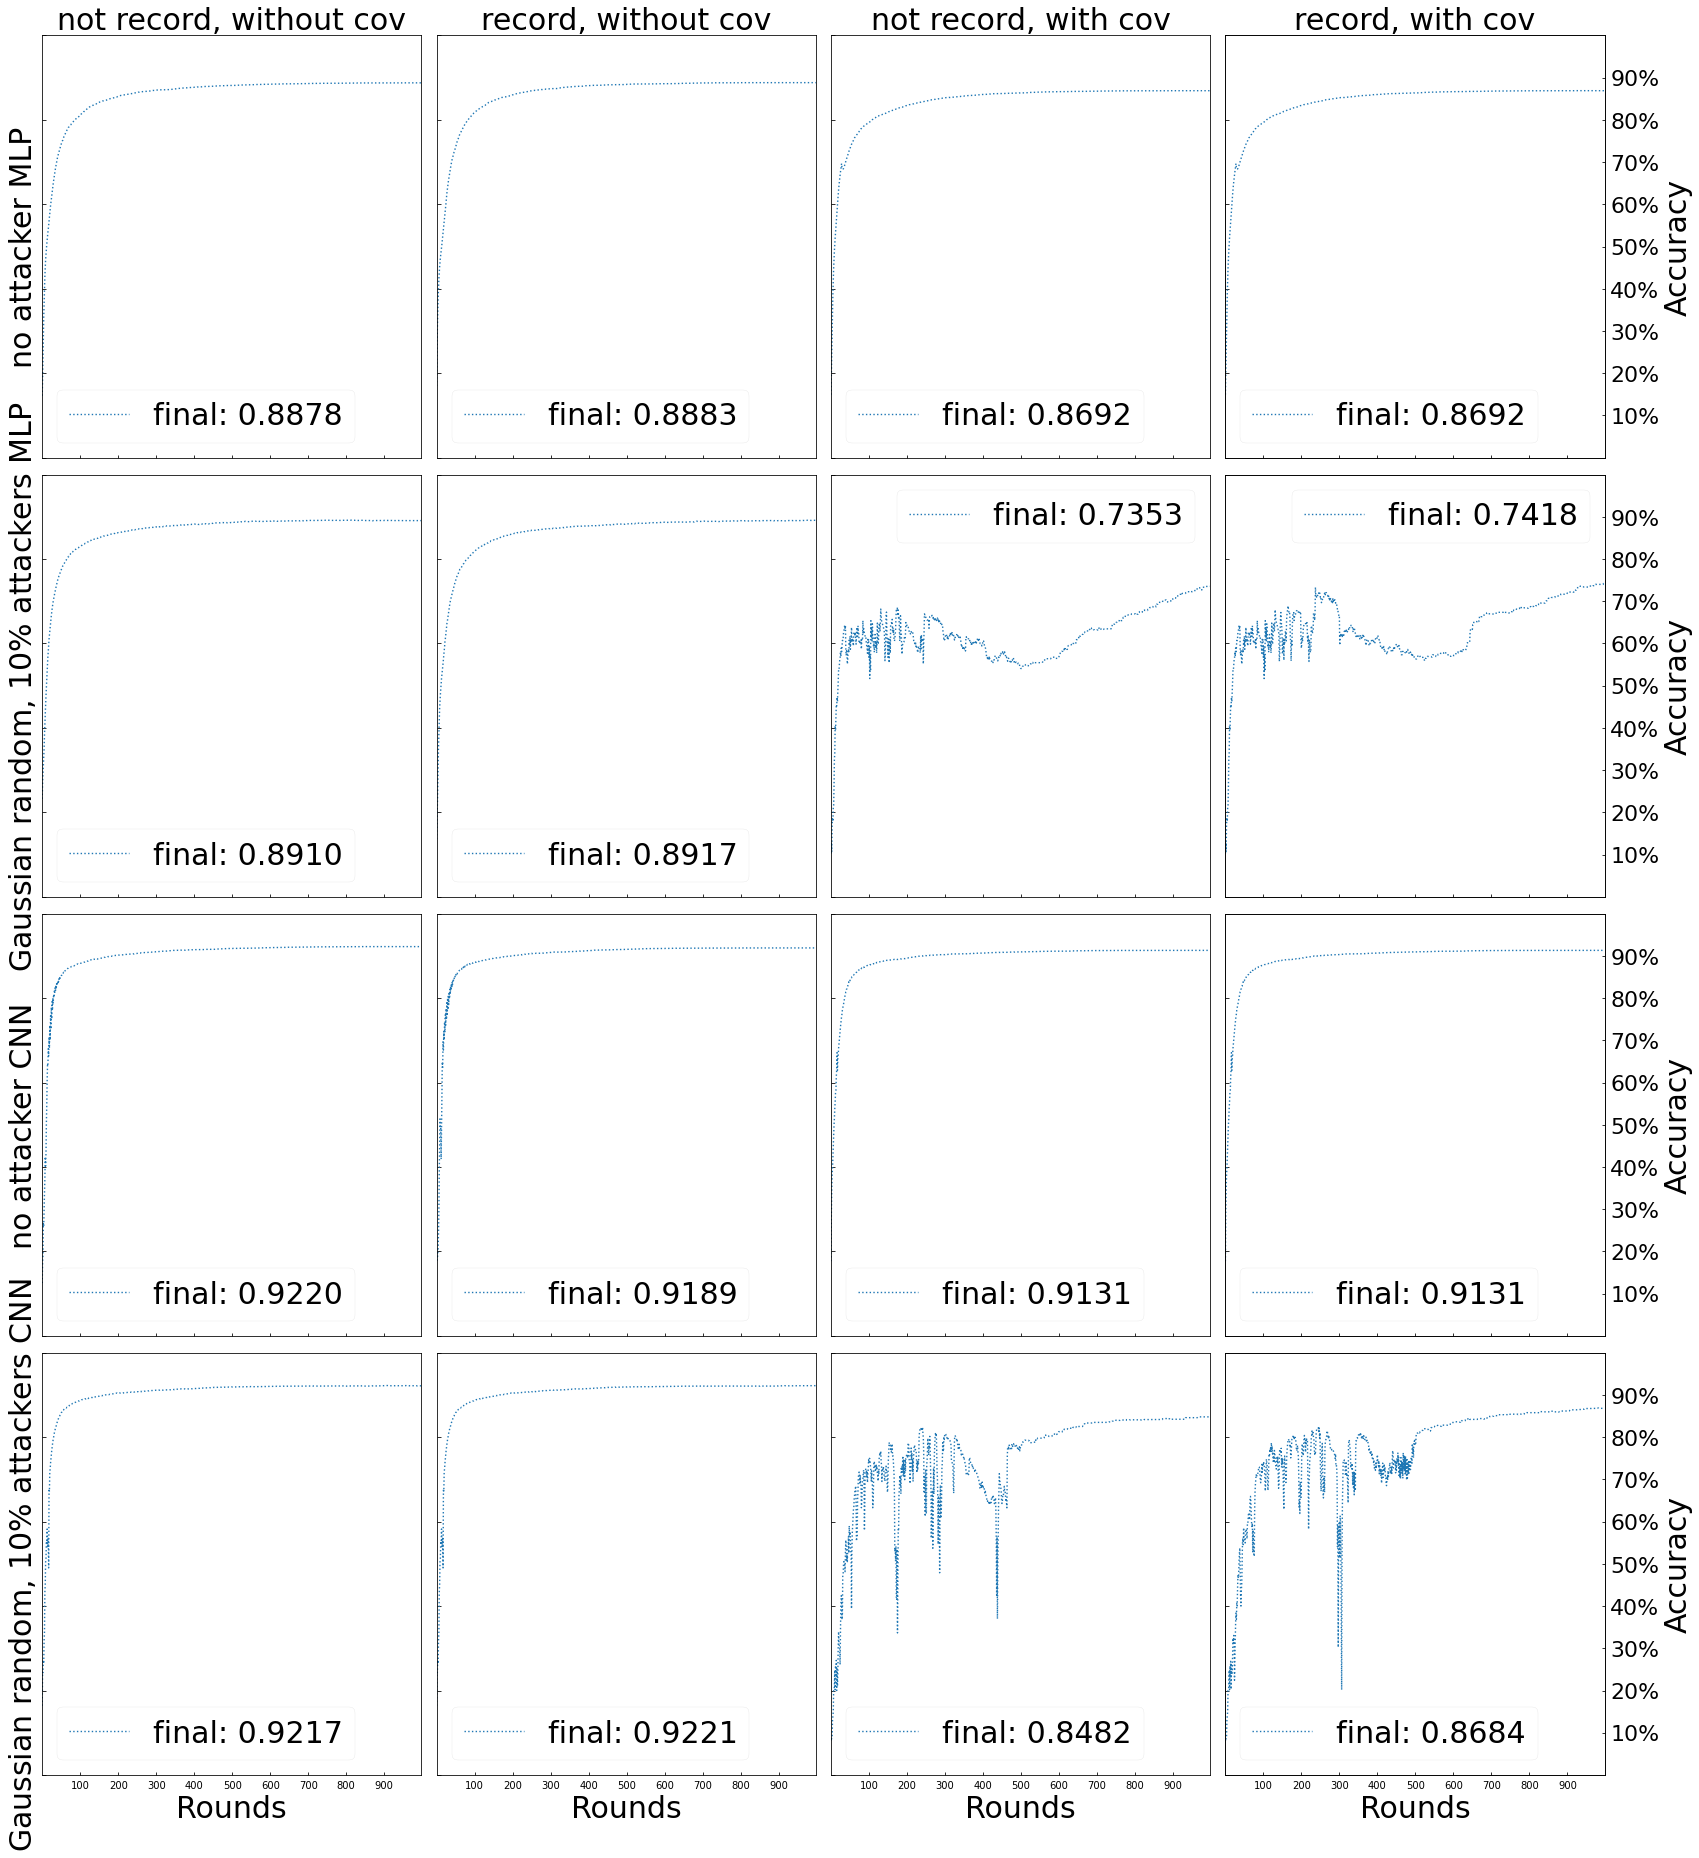

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print ('Analize the results with and without covariance in gamma mean')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'not record, without cov')
ax2.set_title(r'record, without cov')
ax3.set_title(r'not record, with cov')
ax4.set_title(r'record, with cov')


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)

ax5.set_ylabel('Gaussian random, $10\%$ attackers MLP')
ax5.set_ylim(0, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)

ax13.set_ylabel('Gaussian random, $10\%$ attackers CNN')
ax13.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr'
gamma = 0.5
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    aggr = '{}_{}'.format(aggr, str(gamma).replace(".","_"))
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

experiment = 'cnn_expr'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    aggr = '{}_{}'.format(aggr, str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1, label_final=True)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/gamma_mean_analize.pdf', format='pdf', bbox_inches='tight')

Compare different gamma


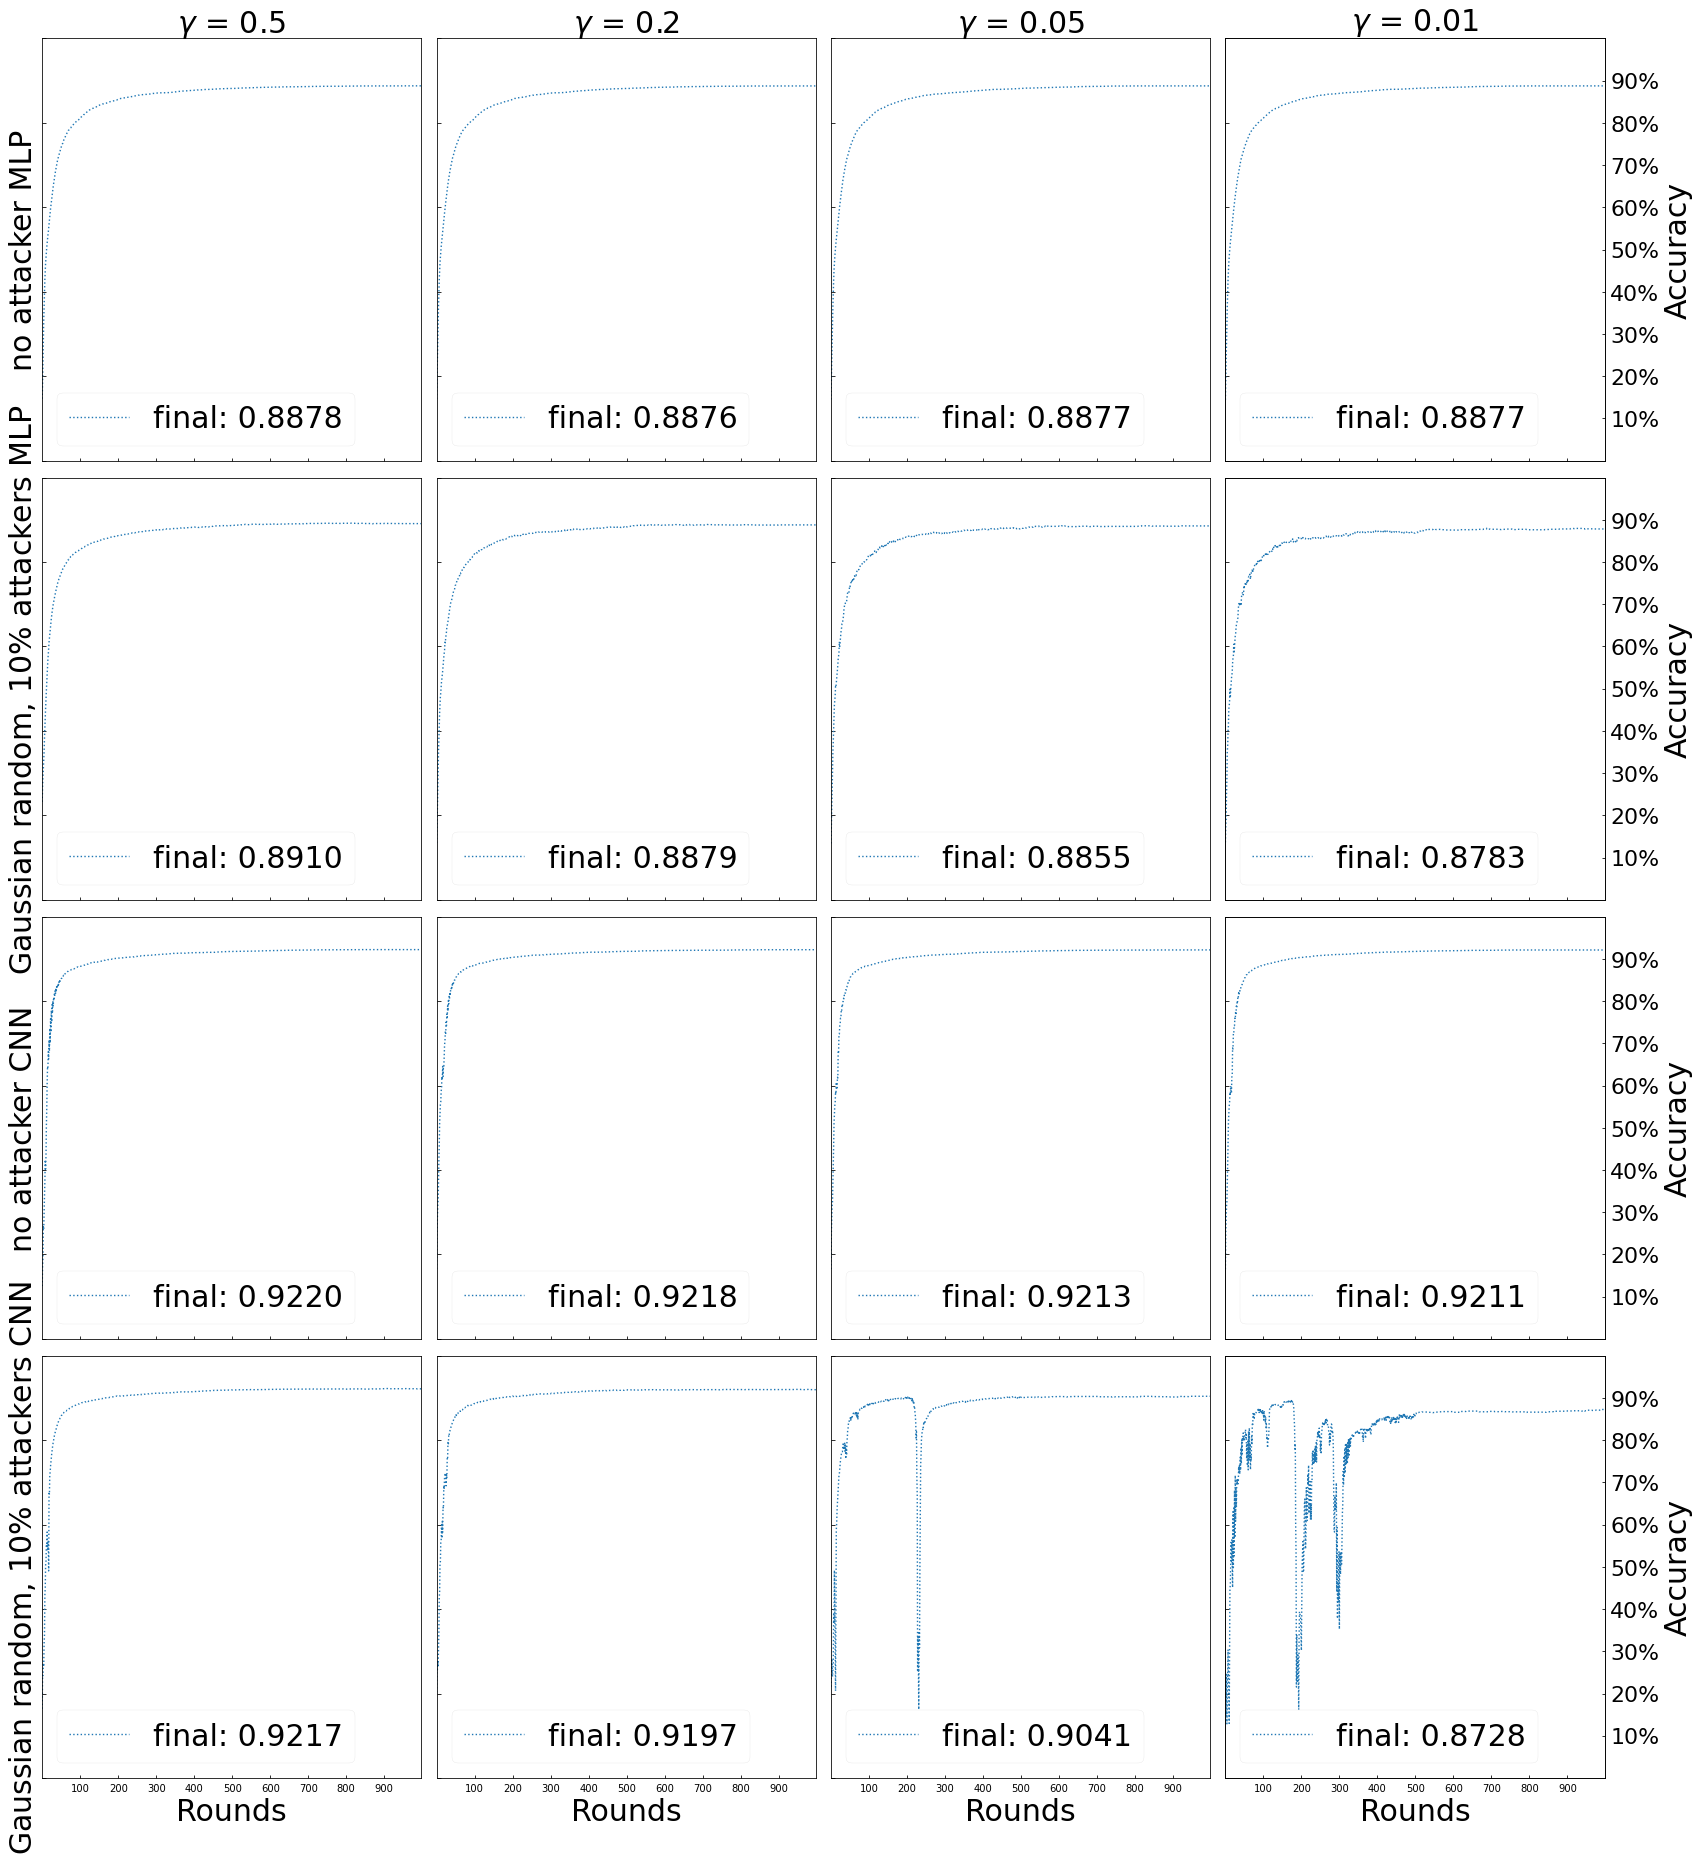

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Compare different gamma')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'$\gamma$ = {}'.format(0.5))
ax2.set_title(r'$\gamma$ = {}'.format(0.2))
ax3.set_title(r'$\gamma$ = {}'.format(0.05))
ax4.set_title(r'$\gamma$ = {}'.format(0.01))


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)

ax5.set_ylabel('Gaussian random, $10\%$ attackers MLP')
ax5.set_ylim(0, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)

ax13.set_ylabel('Gaussian random, $10\%$ attackers CNN')
ax13.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr'
for i, gamma in enumerate(gamma_list):
    aggr = 'simple_gamma_mean_{}'.format(str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

experiment = 'cnn_expr'
for i, gamma in enumerate(gamma_list):
    aggr = 'simple_gamma_mean_{}'.format(str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1, label_final=True)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/Gamma_value.pdf', format='pdf', bbox_inches='tight')

Evaluate the results across different aggregators


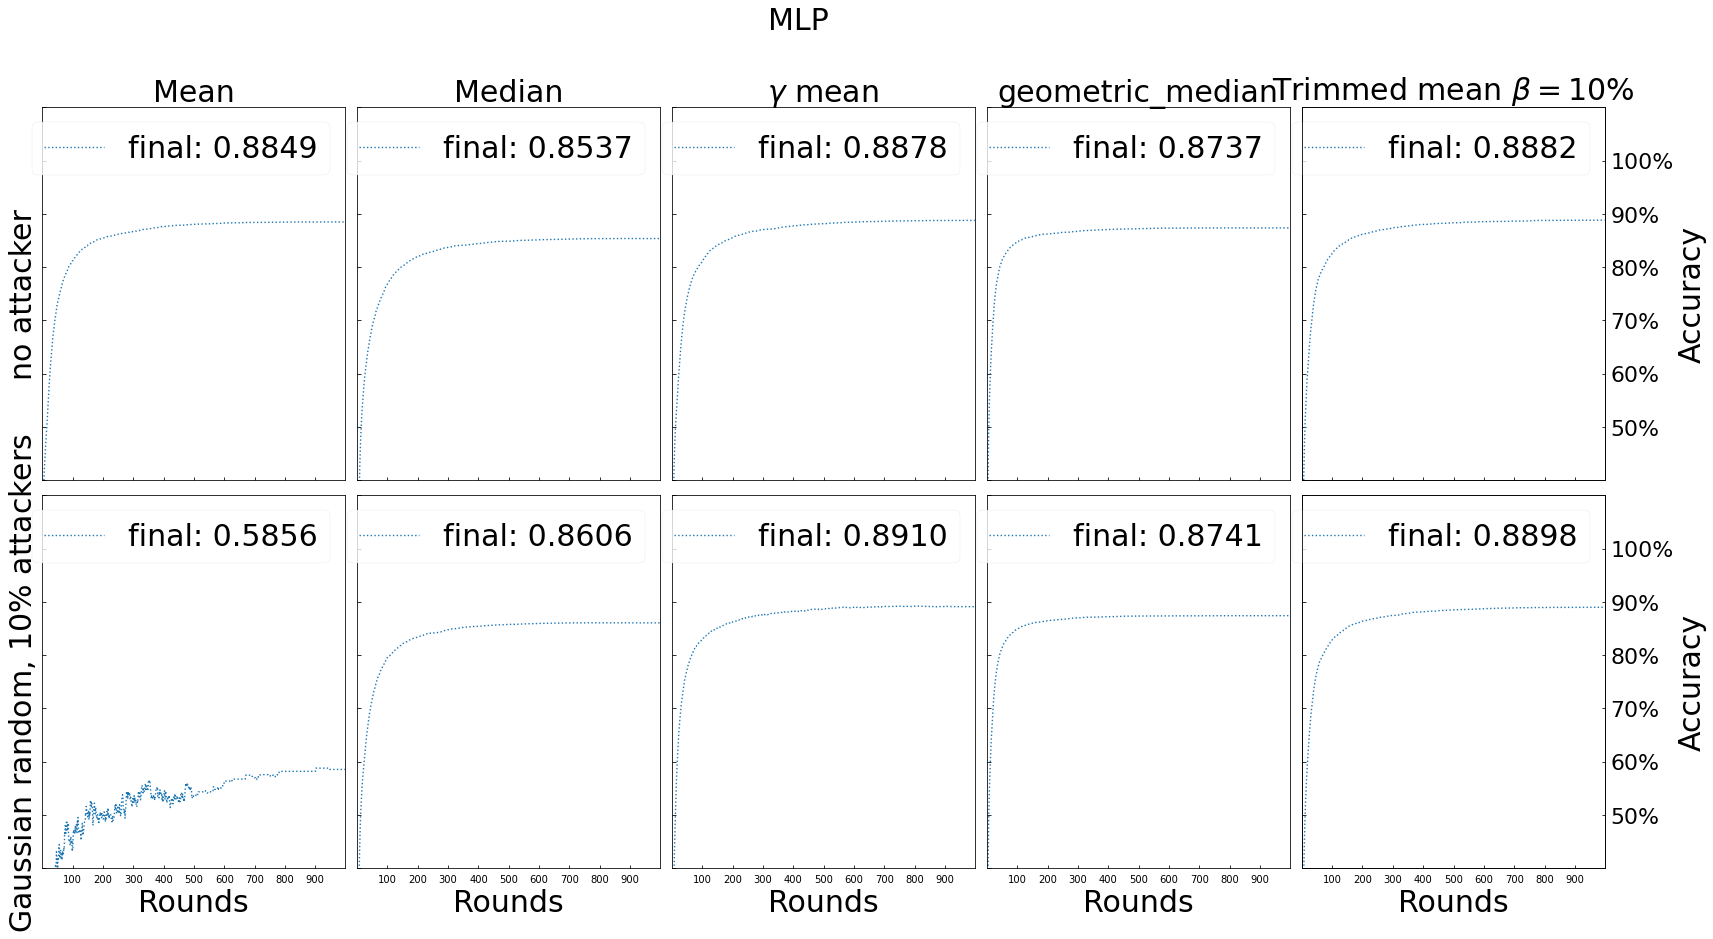

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('MLP')
ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0.4, 1.1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0.4, 1.1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(5, 11)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/MLP_attackers_10.pdf', format='pdf', bbox_inches='tight')

Evaluate the results across different aggregators


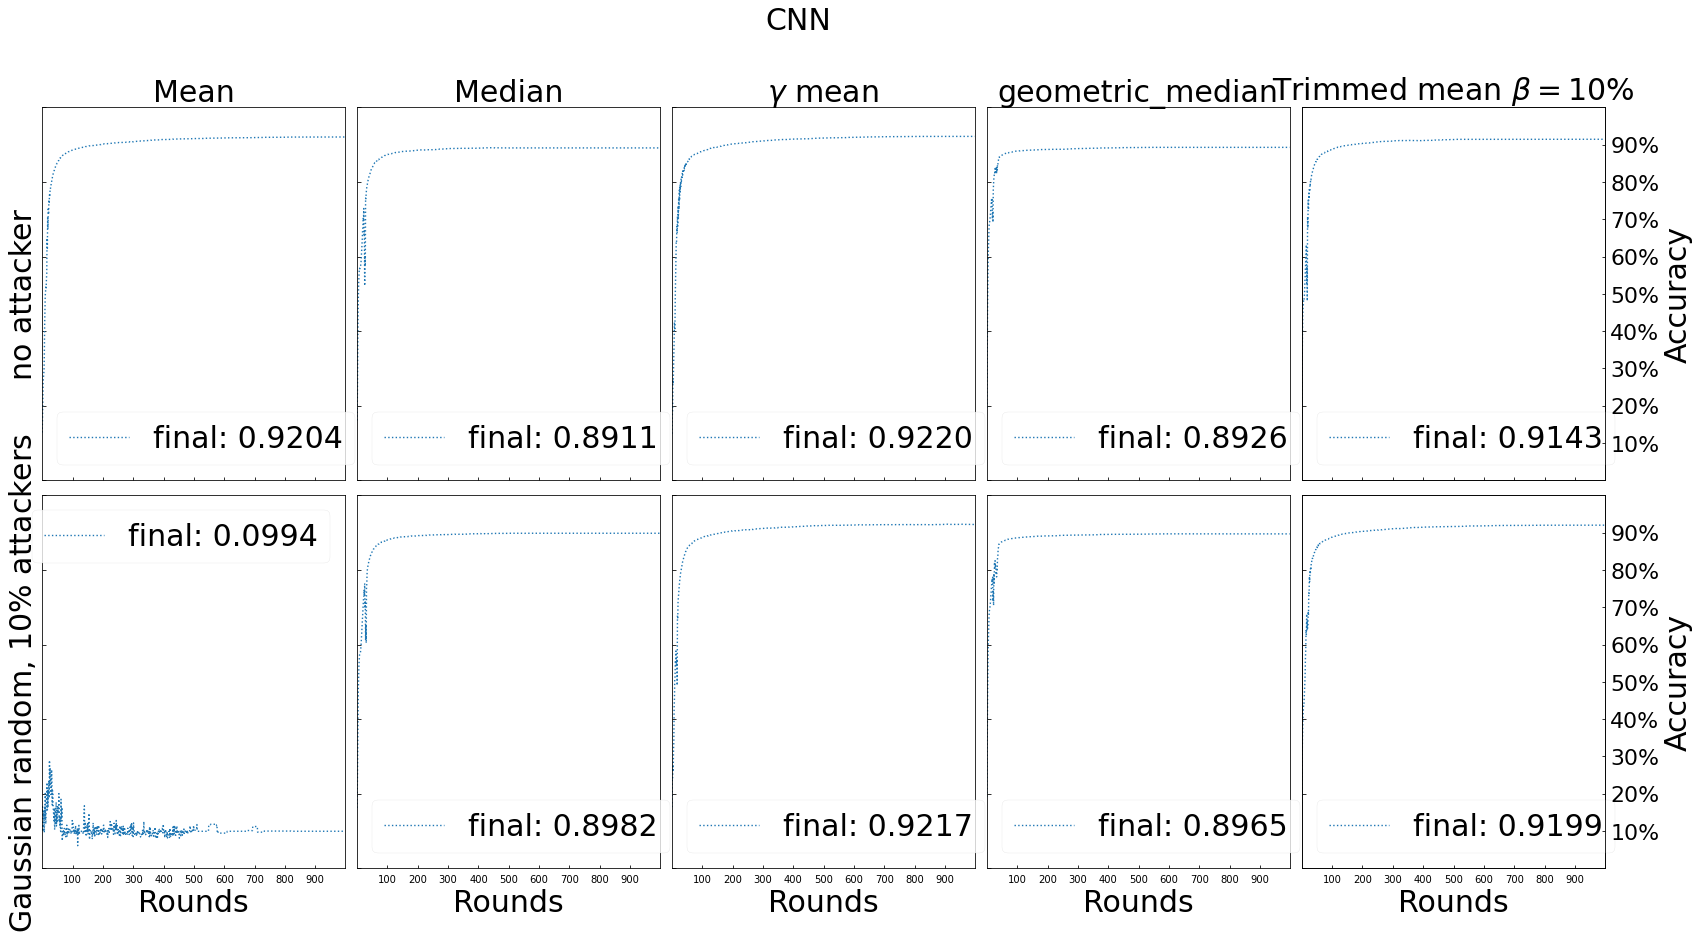

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'cnn_expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('CNN')
ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/CNN_attackers_10.pdf', format='pdf', bbox_inches='tight')

Evaluate the results across different aggregators


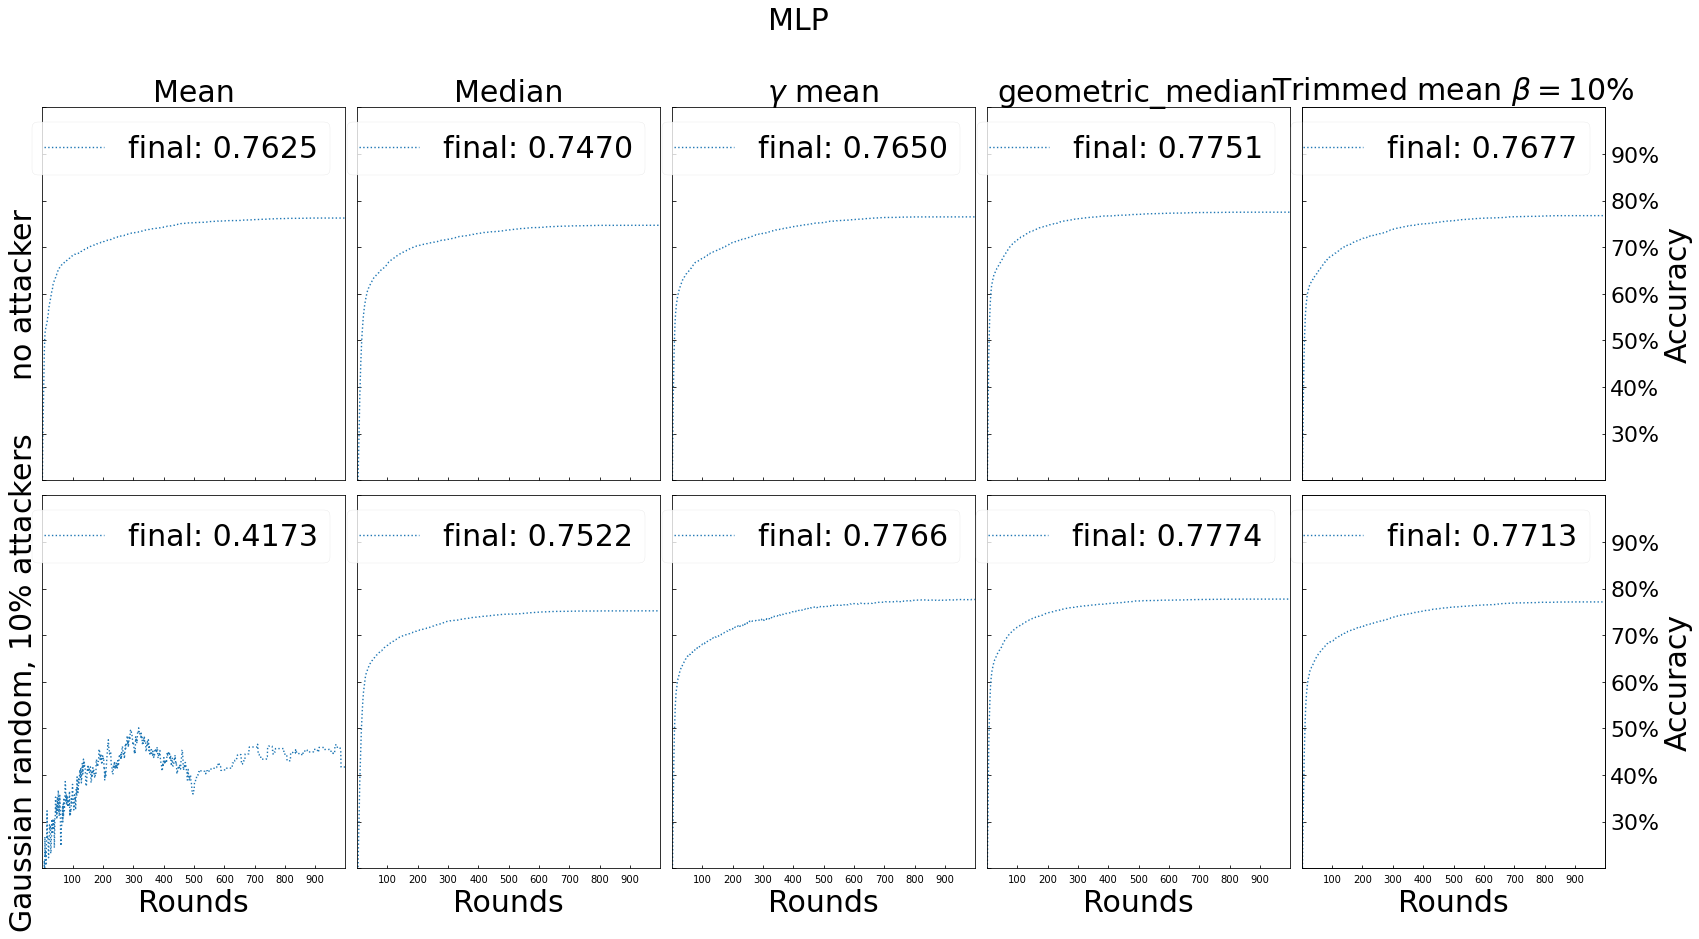

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'fashion_mnist_expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('MLP')
ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0.2, 1) # (0.85, 1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0.2, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(3, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
fig.savefig('plot/fashion_MLP_attackers_10.pdf', format='pdf', bbox_inches='tight')

Evaluate the results across different aggregators


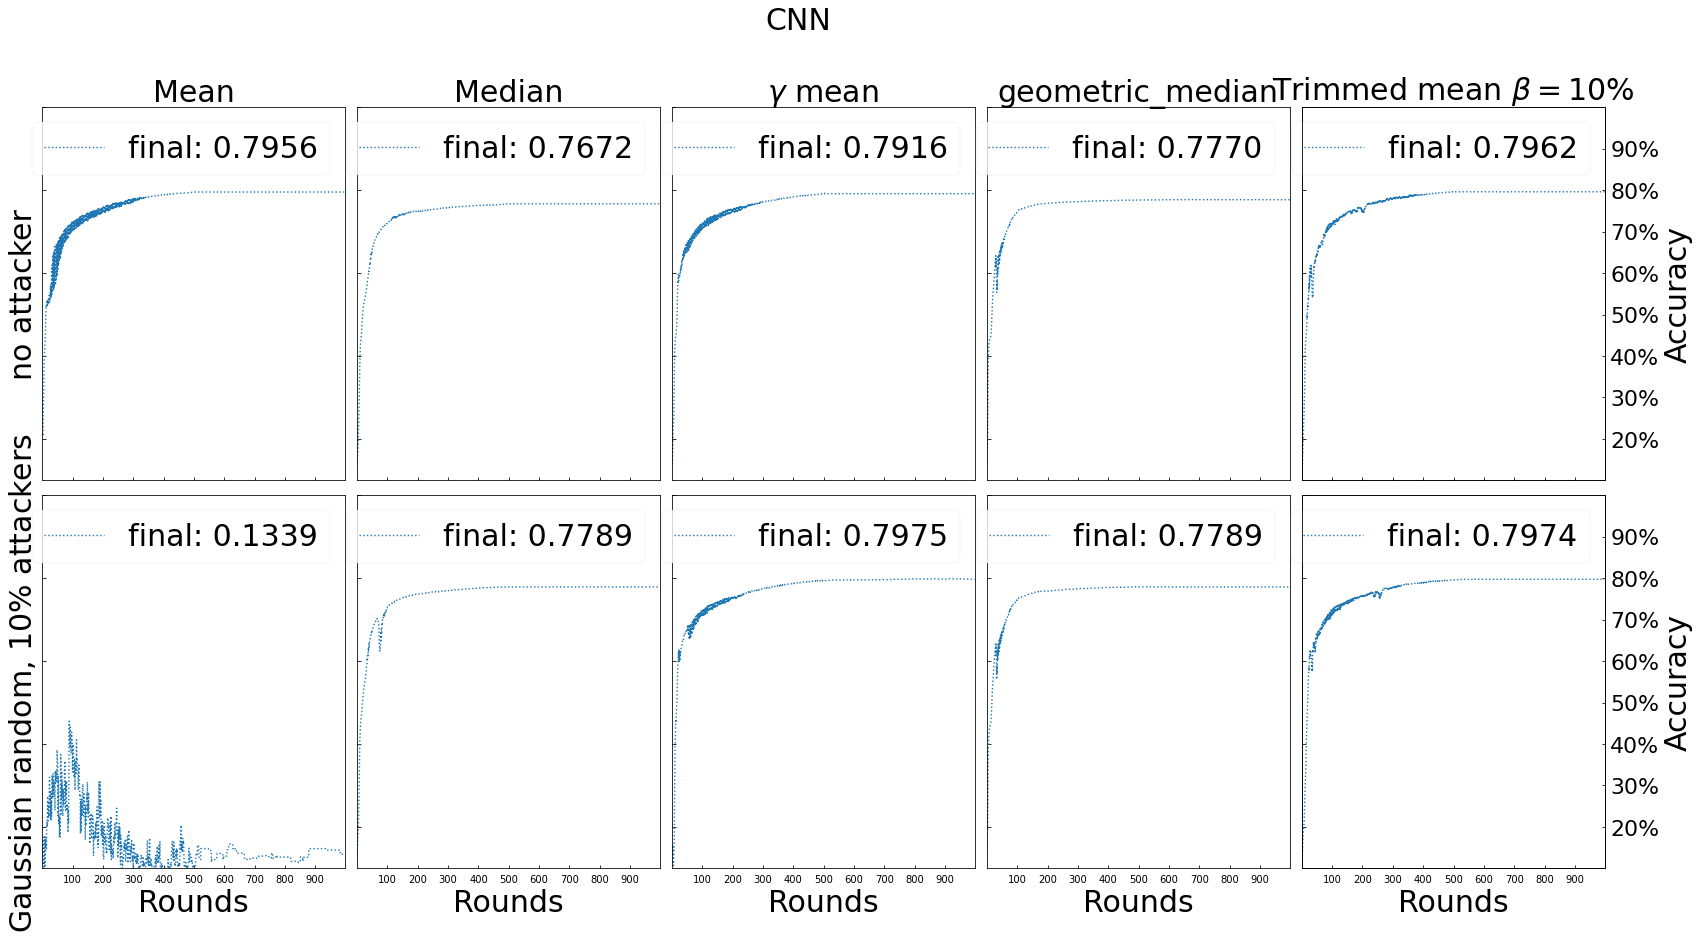

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'fashion_mnist_cnn_expr', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('CNN')
ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('geometric_median')
ax5.set_title(r'Trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax6.set_ylabel('Gaussian random, $10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(2, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
fig.savefig('plot/fashion_CNN_attackers_10.pdf', format='pdf', bbox_inches='tight')